# Principal component analysis (PCA) in Dimensionality Reduction

---



https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca

---

##Install and Data Preparation

In [3]:
# Install required libraries
!pip install yfinance
!pip install matplotlib
!pip install seaborn

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Define stock tickers and date range
tickers = ['AAPL', 'MSFT', 'TSLA', 'KO', 'GOOG']
start_date = '2020-01-01'
end_date = '2024-08-15'

# Download data from Yahoo Finance
stock_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Display the first few rows of the data
stock_data.head()


[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,GOOG,KO,MSFT,TSLA
Date,,,,,
2020-01-02 00:00:00+00:00,72.876114,68.201012,47.451939,153.938202,28.684000
2020-01-03 00:00:00+00:00,72.167603,67.866325,47.193062,152.021408,29.534000
2020-01-06 00:00:00+00:00,72.742661,69.539726,47.175793,152.414352,30.102667
2020-01-07 00:00:00+00:00,72.400520,69.496330,46.813377,151.024643,31.270666
2020-01-08 00:00:00+00:00,73.565201,70.043991,46.899666,153.430267,32.809334


##Fitting data

In [5]:
# Handle missing values by filling forward
stock_data = stock_data.fillna(method='ffill')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock_data)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=stock_data.columns, index=stock_data.index)

# Display scaled data
scaled_data.head()


<ipython-input-5-1101e1c68b78>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data = stock_data.fillna(method='ffill')


Ticker,AAPL,GOOG,KO,MSFT,TSLA
Date,,,,,
2020-01-02 00:00:00+00:00,-1.990663,-1.558321,-0.822355,-1.655629,-2.214354
2020-01-03 00:00:00+00:00,-2.009969,-1.569381,-0.859771,-1.681100,-2.203803
2020-01-06 00:00:00+00:00,-1.994299,-1.514081,-0.862267,-1.675879,-2.196744
2020-01-07 00:00:00+00:00,-2.003622,-1.515515,-0.914647,-1.694345,-2.182246
2020-01-08 00:00:00+00:00,-1.971886,-1.497416,-0.902176,-1.662379,-2.163147


In [6]:
# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'], index=stock_data.index)

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.77706208 0.12758941 0.07168016]


In [7]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=stock_data.index)

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.77706208 0.12758941]


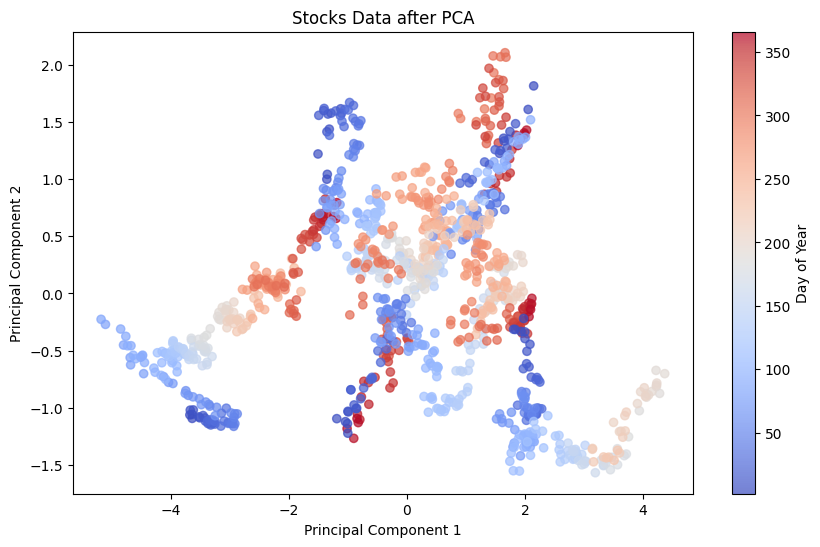

In [8]:
# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, c=pca_df.index.dayofyear, cmap='coolwarm')
plt.colorbar(label='Day of Year')
plt.title('Stocks Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


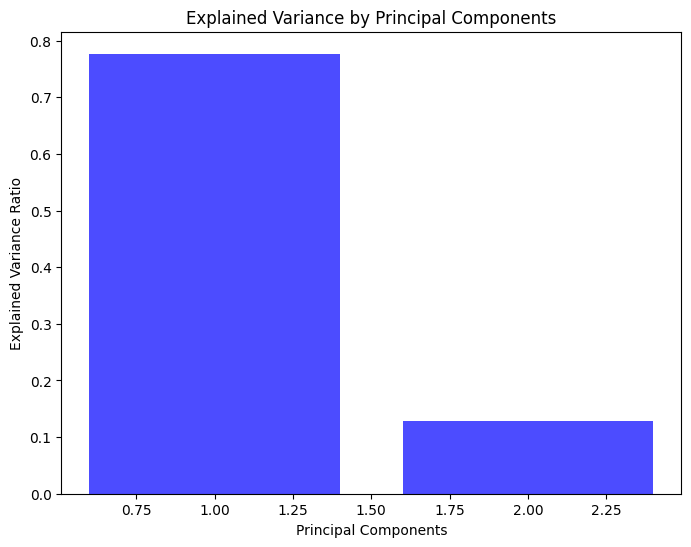

In [9]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), explained_variance, color='blue', alpha=0.7)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


##Portfolio Construction with PC1

In [10]:
# Get the PCA components (loadings)
loadings = pca.components_

# Assign portfolio weights based on the first principal component
portfolio_weights_pc1 = loadings[0] / sum(loadings[0])

# Create a portfolio based on the first principal component
portfolio_pc1 = (scaled_data * portfolio_weights_pc1).sum(axis=1)

# Show portfolio weights based on the first principal component
print("Portfolio Weights (PC1-based):")
for ticker, weight in zip(stock_data.columns, portfolio_weights_pc1):
    print(f'{ticker}: {weight:.4f}')


Portfolio Weights (PC1-based):
AAPL: 0.2222
GOOG: 0.2139
KO: 0.1919
MSFT: 0.2131
TSLA: 0.1589


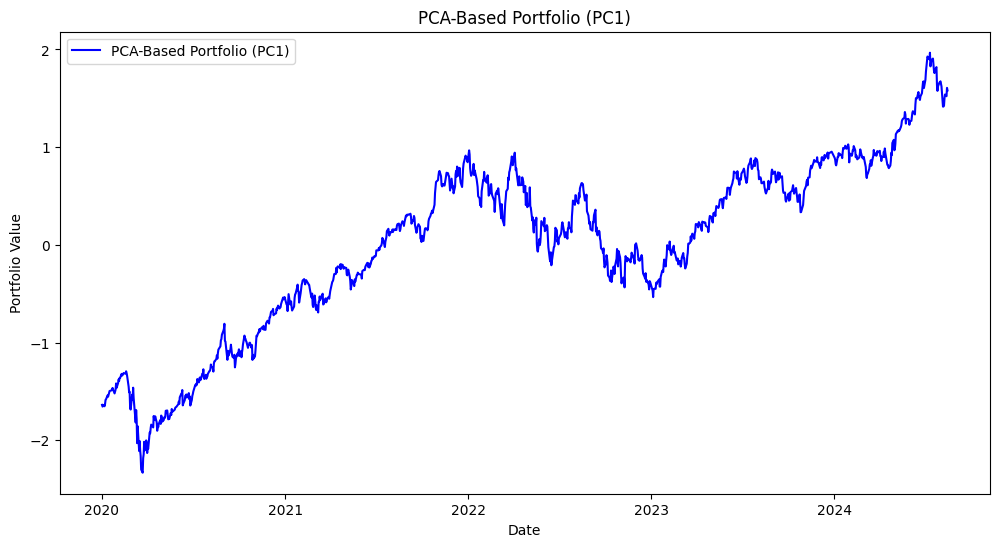

In [11]:
# Plot portfolio_pc1
plt.figure(figsize=(12, 6))
plt.plot(portfolio_pc1, label='PCA-Based Portfolio (PC1)', color='blue')
plt.title('PCA-Based Portfolio (PC1)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

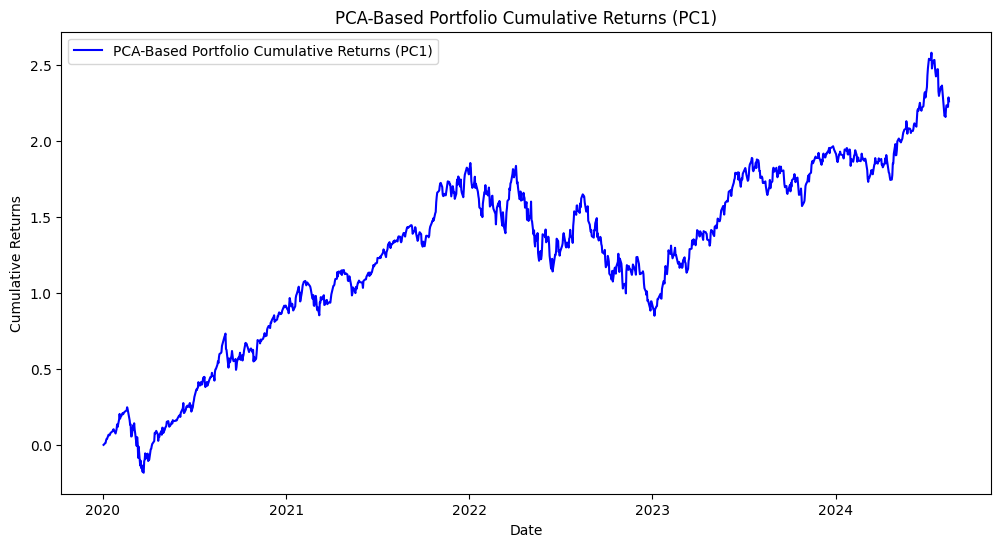

In [12]:
# Calculate daily returns for the stock data
stock_returns = stock_data.pct_change().dropna()
portfolio_pc1_returns = (stock_returns * portfolio_weights_pc1).sum(axis=1)
# Calculate cumulative returns of the PC1-based portfolio
cumulative_returns = (1 + portfolio_pc1_returns).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='PCA-Based Portfolio Cumulative Returns (PC1)', color='blue')
plt.title('PCA-Based Portfolio Cumulative Returns (PC1)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

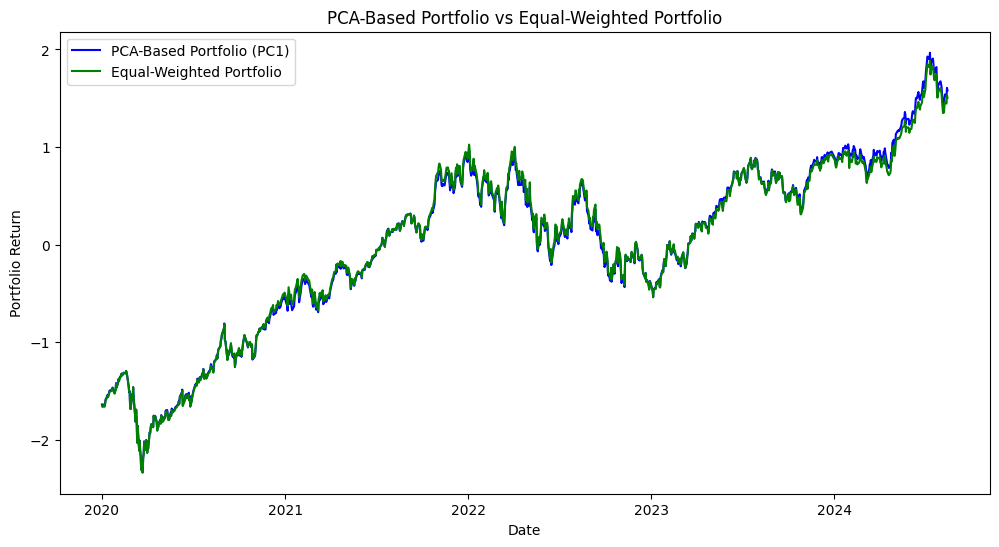

In [13]:
# Create an equal-weighted portfolio
equal_weights = np.ones(len(tickers)) / len(tickers)
equal_weighted_portfolio = (scaled_data * equal_weights).sum(axis=1)

# Plot PCA-based portfolio vs Equal-weighted portfolio
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_pc1, label='PCA-Based Portfolio (PC1)', color='blue')
plt.plot(stock_data.index, equal_weighted_portfolio, label='Equal-Weighted Portfolio', color='green')
plt.title('PCA-Based Portfolio vs Equal-Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Return')
plt.legend()
plt.show()


In [14]:
# Final cumulative returns for portfolio
stock_returns = stock_data.pct_change().dropna()
pca_portfolio_returns = (stock_returns * portfolio_weights_pc1).sum(axis=1)
pca_cumulative_returns = (1 + pca_portfolio_returns).cumprod()
print(f'Final Cumulative Return (PCA-Based Portfolio): {pca_cumulative_returns.iloc[-1]:.4f}')

equal_weighted_returns = (stock_returns * equal_weights).sum(axis=1)
equal_weighted_cumulative_returns = (1 + equal_weighted_returns).cumprod()
print(f'Final Cumulative Return (Equal-Weighted Portfolio): {equal_weighted_cumulative_returns.iloc[-1]:.4f}')

Final Cumulative Return (PCA-Based Portfolio): 3.2606
Final Cumulative Return (Equal-Weighted Portfolio): 3.4377


##Portfolio Construction with PC1 and PC2

In [15]:
# Get PCA components (loadings for PC1 and PC2)
loadings_pc1 = pca.components_[0]
loadings_pc2 = pca.components_[1]

# Normalize weights for PC1 and PC2
portfolio_weights_pc1 = loadings_pc1 / np.sum(np.abs(loadings_pc1))
portfolio_weights_pc2 = loadings_pc2 / np.sum(np.abs(loadings_pc2))

# Combine the two principal components with equal weighting (50% PC1 and 50% PC2)
combined_weights = 0.5 * portfolio_weights_pc1 + 0.5 * portfolio_weights_pc2

# Show combined portfolio weights
print("Combined Portfolio Weights (PC1 and PC2):")
for ticker, weight in zip(stock_data.columns, combined_weights):
    print(f'{ticker}: {weight:.4f}')


Combined Portfolio Weights (PC1 and PC2):
AAPL: 0.0965
GOOG: 0.1039
KO: -0.0145
MSFT: 0.0151
TSLA: 0.3599


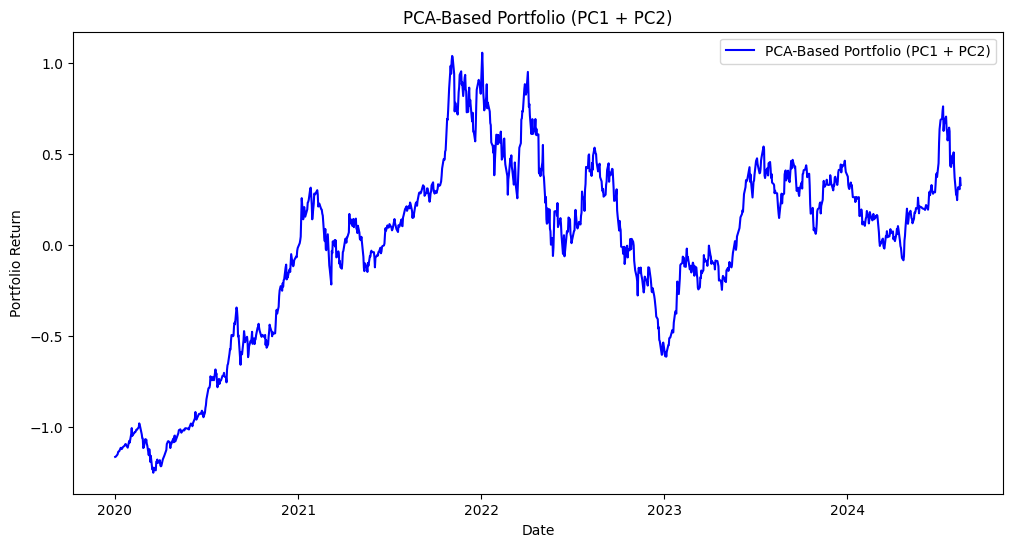

In [16]:
# Create a portfolio based on the combined principal components (PC1 and PC2)
portfolio_pc1_pc2 = (scaled_data * combined_weights).sum(axis=1)

# Plot the portfolio returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_pc1_pc2, label='PCA-Based Portfolio (PC1 + PC2)', color='blue')
plt.title('PCA-Based Portfolio (PC1 + PC2)')
plt.xlabel('Date')
plt.ylabel('Portfolio Return')
plt.legend()
plt.show()


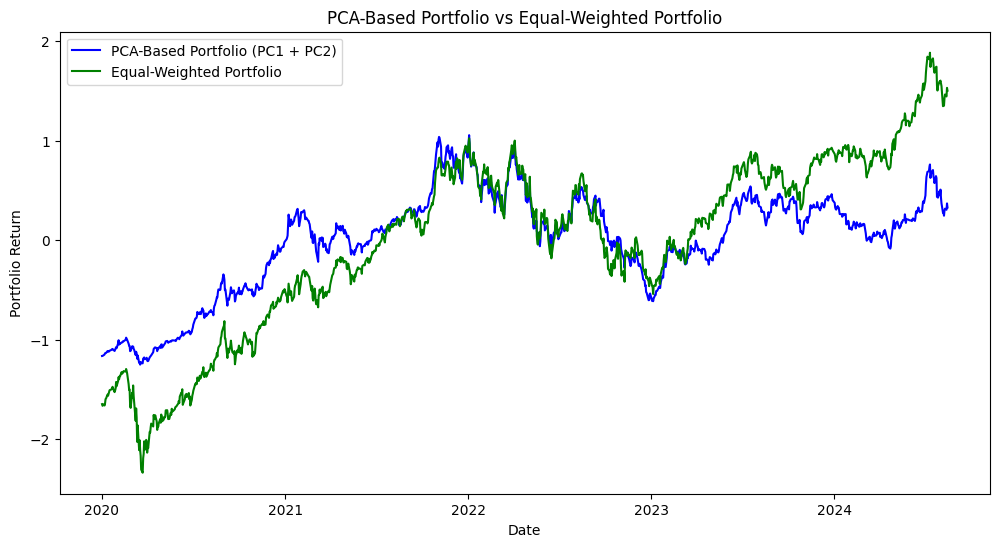

In [17]:
# Equal-weighted portfolio for comparison
equal_weights = np.ones(len(tickers)) / len(tickers)
equal_weighted_portfolio = (scaled_data * equal_weights).sum(axis=1)

# Plot PCA-based portfolio vs equal-weighted portfolio
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_pc1_pc2, label='PCA-Based Portfolio (PC1 + PC2)', color='blue')
plt.plot(stock_data.index, equal_weighted_portfolio, label='Equal-Weighted Portfolio', color='green')
plt.title('PCA-Based Portfolio vs Equal-Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Return')
plt.legend()
plt.show()


In [18]:
import cvxpy as cp

# Define optimization variables
n_assets = len(tickers)
weights = cp.Variable(n_assets)

# Portfolio variance (covariance matrix of stock returns)
cov_matrix = np.cov(scaled_data.T)
portfolio_variance = cp.quad_form(weights, cov_matrix)

# Constraints: sum of weights = 1 and non-negative weights
constraints = [cp.sum(weights) == 1, weights >= 0]

# Minimize portfolio variance
objective = cp.Minimize(portfolio_variance)
problem = cp.Problem(objective, constraints)
problem.solve()

# Optimal portfolio weights
optimal_weights = weights.value

# Display optimal weights
print("Optimal Portfolio Weights (PC1 + PC2):")
for ticker, weight in zip(stock_data.columns, optimal_weights):
    print(f'{ticker}: {weight:.4f}')


Optimal Portfolio Weights (PC1 + PC2):
AAPL: 0.0000
GOOG: -0.0000
KO: 0.3100
MSFT: 0.2578
TSLA: 0.4322


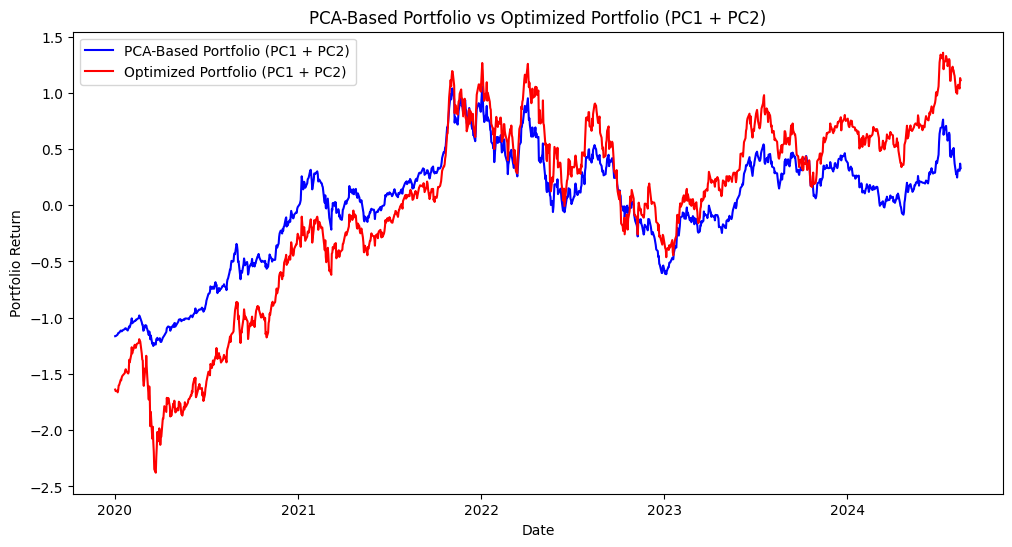

In [19]:
# Create optimized portfolio based on optimal weights
optimized_portfolio_pc1_pc2 = (scaled_data * optimal_weights).sum(axis=1)

# Plot PCA-based portfolio vs Optimized portfolio
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_pc1_pc2, label='PCA-Based Portfolio (PC1 + PC2)', color='blue')
plt.plot(stock_data.index, optimized_portfolio_pc1_pc2, label='Optimized Portfolio (PC1 + PC2)', color='red')
plt.title('PCA-Based Portfolio vs Optimized Portfolio (PC1 + PC2)')
plt.xlabel('Date')
plt.ylabel('Portfolio Return')
plt.legend()
plt.show()


In [20]:
# Calculate the returns for portfolio
stock_returns = stock_data.pct_change().dropna()
portfolio_pc1_pc2 = (scaled_data * combined_weights).sum(axis=1)
pc1_pc2_cumulative_returns = (1 + portfolio_pc1_pc2).cumprod()
print(f'Final Cumulative Return (PC1-2-Based Portfolio): {pc1_pc2_cumulative_returns.iloc[-1]:.4f}')

Final Cumulative Return (PC1-2-Based Portfolio): -0.0000


In [21]:
# Calculate the returns for portfolio
optimized_portfolio_returns = (stock_returns * optimal_weights).sum(axis=1)
# Calculate cumulative returns for portfolio
optimized_cumulative_returns = (1 + optimized_portfolio_returns).cumprod()
print(f'Optimized Cumulative Return (Optimiztion-Based Portfolio): {optimized_cumulative_returns.iloc[-1]:.4f}')

Optimized Cumulative Return (Optimiztion-Based Portfolio): 4.2676


#Machine Learning

[*********************100%***********************]  5 of 5 completed
<ipython-input-24-91ab2564807e>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data = stock_data.fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.

Mean Absolute Error: 0.2481
Root Mean Squared Error: 0.6176


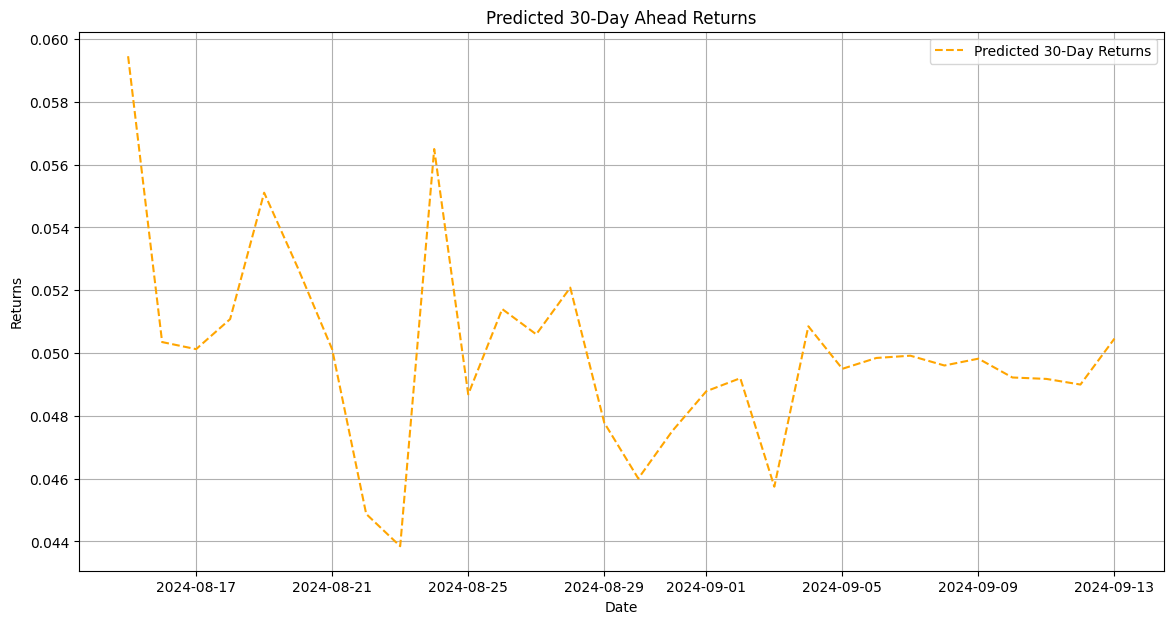

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Define stock tickers and date range
tickers = ['AAPL', 'MSFT', 'TSLA', 'KO', 'GOOG']
start_date = '2020-01-01'
end_date = '2024-08-15'

# Download data from Yahoo Finance
stock_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
stock_data = stock_data.fillna(method='ffill')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock_data)
scaled_data = pd.DataFrame(scaled_data, columns=stock_data.columns, index=stock_data.index)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=stock_data.index)

# Assign portfolio weights based on the first principal component
loadings = pca.components_
portfolio_weights_pc1 = loadings[0] / sum(loadings[0])
portfolio_pc1 = (scaled_data * portfolio_weights_pc1).sum(axis=1)

# Calculate daily returns
portfolio_returns = portfolio_pc1.pct_change().dropna()
features_df = pd.DataFrame(index=portfolio_returns.index)
features_df['Return'] = portfolio_returns

# Create lagged features
for lag in range(1, 21):
    features_df[f'Lag_{lag}'] = features_df['Return'].shift(lag)
features_df = features_df.dropna()

# Define target variable
features_df['Target'] = features_df['Return'].shift(-30)
features_df = features_df.dropna()
X = features_df.drop(columns=['Target'])
y = features_df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

# Predict 30 days ahead
# Get the latest data for prediction
latest_features = X.iloc[-1:].values

# Generate predictions for the next 30 days
future_dates = pd.date_range(start=stock_data.index[-1] + pd.Timedelta(days=1), periods=30)
future_predictions = []

for _ in range(30):
    pred = model.predict(latest_features)
    future_predictions.append(pred[0])
    # Update latest_features with the new prediction
    latest_features = np.roll(latest_features, shift=-1, axis=1)
    latest_features[0, -1] = pred[0]

# Create DataFrame for future predictions
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Return': future_predictions
})

# Plot the predicted 30-day returns
plt.figure(figsize=(14, 7))
plt.plot(predictions_df['Date'], predictions_df['Predicted Return'], label='Predicted 30-Day Returns', color='orange', linestyle='--')
plt.title('Predicted 30-Day Ahead Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Import the Ridge class from sklearn.linear_model
from sklearn.linear_model import Ridge
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f'Ridge Regression - Mean Absolute Error: {mae_ridge:.4f}')
print(f'Ridge Regression - Root Mean Squared Error: {rmse_ridge:.4f}')

Ridge Regression - Mean Absolute Error: 0.2480
Ridge Regression - Root Mean Squared Error: 0.6175


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warning

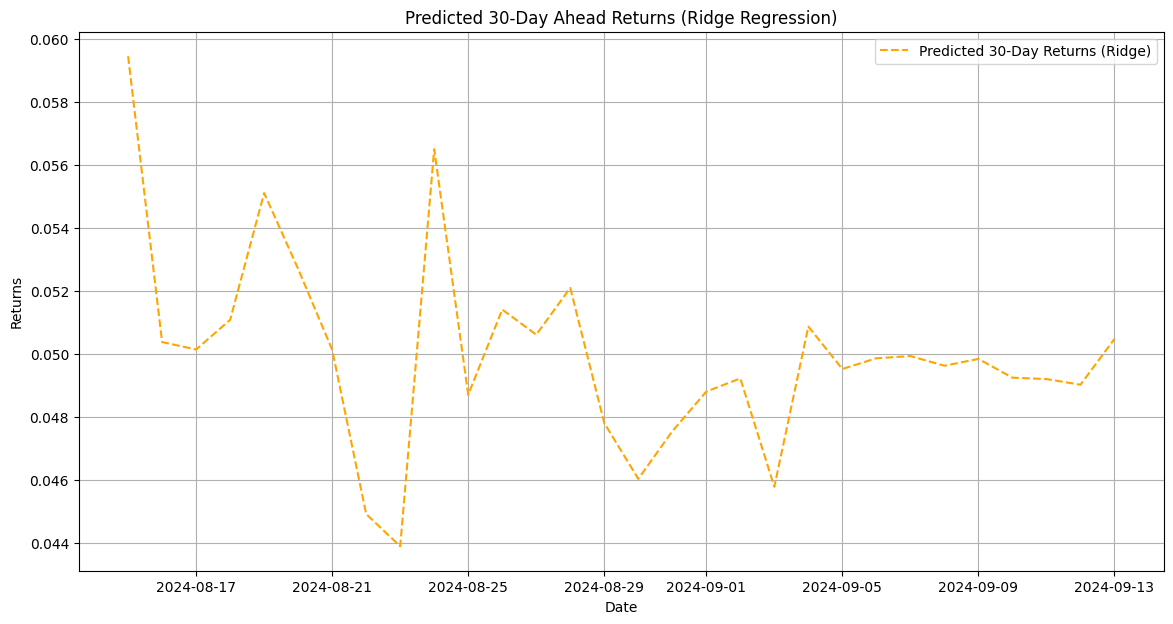

In [26]:
# Predict 30 days ahead with Ridge Regression
latest_features = X.iloc[-1:].values
future_dates = pd.date_range(start=stock_data.index[-1] + pd.Timedelta(days=1), periods=30)
future_predictions_ridge = []

for _ in range(30):
    pred = ridge_model.predict(latest_features)
    future_predictions_ridge.append(pred[0])
    latest_features = np.roll(latest_features, shift=-1, axis=1)
    latest_features[0, -1] = pred[0]

# Create DataFrame for future predictions
future_predictions_df_ridge = pd.DataFrame({
    'Date': future_dates,
    'Predicted Return': future_predictions_ridge
})

# Plot the predicted 30-day returns
plt.figure(figsize=(14, 7))
plt.plot(future_predictions_df_ridge['Date'], future_predictions_df_ridge['Predicted Return'], label='Predicted 30-Day Returns (Ridge)', color='orange', linestyle='--')
plt.title('Predicted 30-Day Ahead Returns (Ridge Regression)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

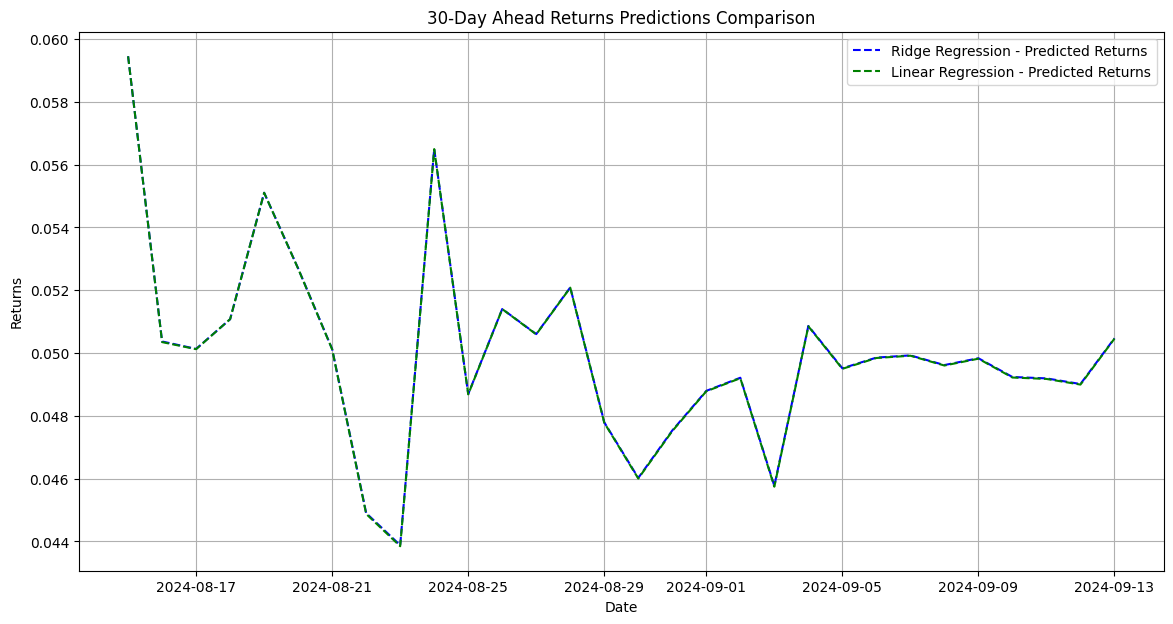

In [27]:
# Merge predictions DataFrames
combined_df = pd.merge(future_predictions_df_ridge, predictions_df, on='Date', suffixes=('_Ridge', '_LinearRegression'))

# Plot the comparison
plt.figure(figsize=(14, 7))
plt.plot(combined_df['Date'], combined_df['Predicted Return_Ridge'], label='Ridge Regression - Predicted Returns', color='blue', linestyle='--')
plt.plot(combined_df['Date'], combined_df['Predicted Return_LinearRegression'], label='Linear Regression - Predicted Returns', color='green', linestyle='--')
plt.title('30-Day Ahead Returns Predictions Comparison')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
combined_df

,Date,Predicted Return_Ridge,Predicted Return_LinearRegression
0,2024-08-15 00:00:00+00:00,0.059452,0.059450
1,2024-08-16 00:00:00+00:00,0.050369,0.050349
2,2024-08-17 00:00:00+00:00,0.050133,0.050124
3,2024-08-18 00:00:00+00:00,0.051077,0.051080
4,2024-08-19 00:00:00+00:00,0.055103,0.055104
5,2024-08-20 00:00:00+00:00,0.052694,0.052687
6,2024-08-21 00:00:00+00:00,0.050126,0.050117
7,2024-08-22 00:00:00+00:00,0.044903,0.044877
8,2024-08-23 00:00:00+00:00,0.043883,0.043849
9,2024-08-24 00:00:00+00:00,0.056497,0.056495


#END